# Task 1

In [2]:
%load_ext autoreload
%autoreload 2

import pandas as pd
import numpy as np
import cv2
import matplotlib
import matplotlib.pyplot as plt
import math
import utils

C:\Users\giova\AppData\Local\Temp\ipykernel_14060\4068229030.py:4: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


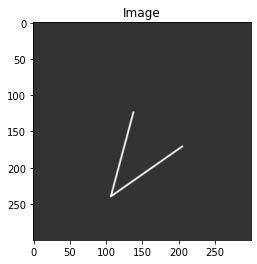

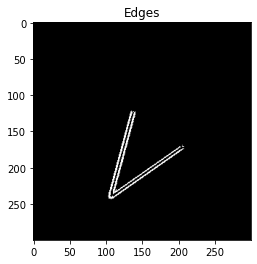

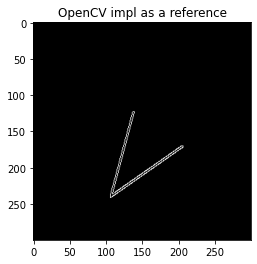

(<matplotlib.image.AxesImage at 0x1ce927564c0>,
 Text(0.5, 1.0, 'OpenCV impl as a reference'),
 None)

In [2]:
img = cv2.imread("Task1Dataset\\image1.png")
img = img[0:300, 500:800]

# img = cv2.imread("ducks.jpeg")
# img = img[1200:1800,1200:1800]

img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)), plt.title('Image'), plt.show()

img_canny = utils.canny(img, 
                  gauss_kernel_size=5, 
                  sigma=5, 
                  low_threshold=70, 
                  high_threshold=110
                  )
plt.imshow(cv2.cvtColor(img_canny, cv2.COLOR_GRAY2RGB)), plt.title('Edges'), plt.show()

img_canny_reference = cv2.Canny(img, threshold1=70, threshold2=110)
plt.imshow(cv2.cvtColor(img_canny_reference, cv2.COLOR_GRAY2RGB)), plt.title('OpenCV impl as a reference'), plt.show()

# Our Implementation Clean <br>
https://theailearner.com/tag/hysteresis-thresholding/

Initialize the accumulator (H) to all zeros 

For each edge pixel (x,y) in the image

    For Θ = 0 to 180
    
        Calculate r (r = x*cosΘ + y*sinΘ)
        
        H(Θ,r) = H(Θ,r) +1

        endFor
    
    endFor
    
Find the (Θ,r) value(s), where H(Θ,r) is above a suitable threshold value.

In [105]:
# Example usage
#img = cv2.imread('image.jpg', cv2.IMREAD_GRAYSCALE)

img = cv2.imread("Task1Dataset\\image4.png", cv2.IMREAD_GRAYSCALE)
edges = cv2.Canny(img, 50, 150)
#edges= utils.canny(img, gauss_kernel_size=5, sigma=20, low_threshold=50, high_threshold=150)
lines = utils.hough_lines(edges, 20)
#lines = utils.get_lines(accumulator, theta_range, rho_range, threshold=100)
output_img = cv2.cvtColor(edges, cv2.COLOR_GRAY2BGR)
utils.draw_lines(output_img, lines)
cv2.imshow('Hough Lines', output_img)
cv2.waitKey(0)
cv2.destroyAllWindows()

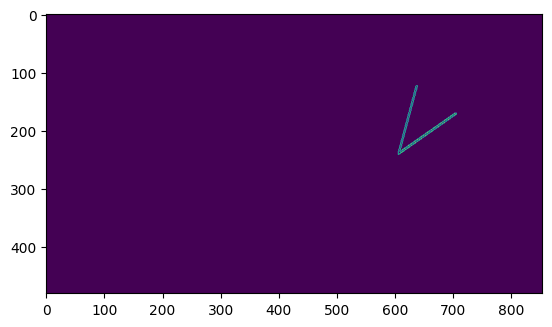

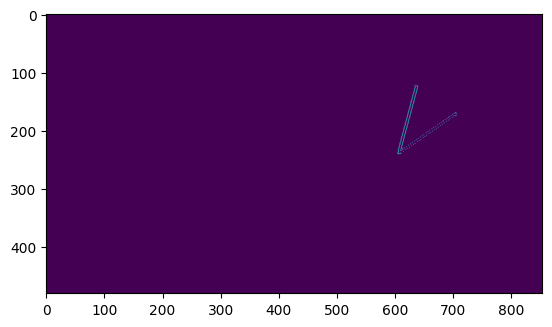

In [91]:
img = cv2.imread("Task1Dataset\\image1.png", cv2.IMREAD_GRAYSCALE)
edges = cv2.Canny(img, 50, 150)
edges2 = utils.canny(img, gauss_kernel_size=5, sigma=2, low_threshold=10, high_threshold=15)
plt.imshow(edges)
plt.show()
plt.imshow(edges2)

<>:2: SyntaxWarning: invalid escape sequence '\i'
<>:2: SyntaxWarning: invalid escape sequence '\i'
C:\Users\giova\AppData\Local\Temp\ipykernel_27272\424936790.py:2: SyntaxWarning: invalid escape sequence '\i'
  img = cv2.imread('Task1Dataset\image7.png', cv2.IMREAD_GRAYSCALE)


[-0.8726646259971648, -0.8726646259971648, -0.8726646259971648, 0.7853981633974483, 0.7853981633974483, 0.7853981633974483]
theta: 95.0 -- correct_answer: 20 -- FAIL


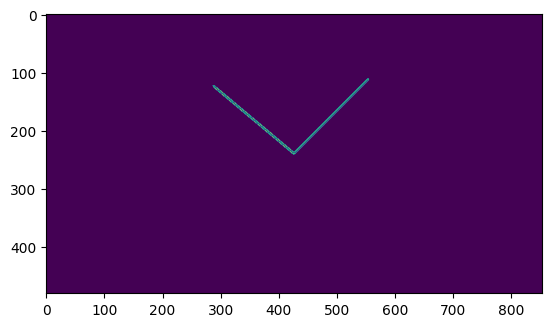

In [166]:
# Example usage
img = cv2.imread('Task1Dataset\image7.png', cv2.IMREAD_GRAYSCALE)
edges = cv2.Canny(img, 20, 40)
accumulator, theta_range, rho_range = utils.hough_line(edges)
hough_line = utils.get_lines(accumulator, theta_range, rho_range, threshold=100)
line_angles = []
plt.imshow(edges)
plt.plot()

for rho, theta in hough_line:
    #print(line)
    #(rho, theta) = (line[0][0], line[0][1])
    # Handle whether the line is in the positive or negative x
    if (rho < 0):
        theta += np.pi

    line_angles.append(theta)

    #continue
print(line_angles)
if(len(line_angles) < 2):
    print(f"Skipping  - need at least 2 lines")
    #continue

# Calculate difference of angles and choose the smaller angle
angle1 = max(line_angles) - min(line_angles)
angle2 = (2 * np.pi) - angle1
angle_between_lines = min(angle1, angle2)
angle_between_lines = np.round(np.rad2deg(angle_between_lines))

pass_fail_string = "PASS" if angle_between_lines == 20 else "FAIL"
print(f"theta: {angle_between_lines} -- correct_answer: {20} -- {pass_fail_string}")

In [2]:
dataset = pd.read_csv("Task1Dataset\list.txt")

for (i, row) in enumerate(dataset.itertuples()):
    filename, correct_answer = row.FileName, row.AngleInDegrees

    # Read in image, importantly with intensity values 0-255 not 0-1
    img = cv2.imread(f"Task1Dataset\{filename}", cv2.IMREAD_GRAYSCALE)

    edges = utils.canny(img, gauss_kernel_size=5, sigma=20, low_threshold=20, high_threshold=80)
    # plt.imshow(img)
    # plt.show()
    accumulator, theta_range, rho_range = utils.hough_line(edges, theta_res= 2.8)
    hough_lines = utils.get_lines(accumulator, theta_range, rho_range, threshold=80)
    
    line_angles = []
    for rho, theta in hough_lines:
        # Handle whether the line is in the positive or negative x
        if (rho < 0):
            theta += np.pi

        line_angles.append(theta)

        #continue
    print(line_angles)
    if(len(line_angles) < 2):
        print(f"Skipping  - need at least 2 lines")
        #continue

    # Calculate difference of angles and choose the smaller angle
    angle1 = max(line_angles) - min(line_angles)
    angle2 = (2 * np.pi) - angle1
    angle_between_lines = min(angle1, angle2)
    angle_between_lines = np.round(np.rad2deg(angle_between_lines))

    pass_fail_string = "PASS" if angle_between_lines == correct_answer else "FAIL"
    print(f"theta: {angle_between_lines} -- correct_answer: {correct_answer} -- {pass_fail_string}")

[1.019272283164686, 0.9704030641088447, 0.9704030641088447, 0.9704030641088447, 0.9704030641088447, 0.23736477827122698, 0.23736477827122698, 0.28623399732706817, 0.1884955592153858, 0.28623399732706817, 0.23736477827122698, 0.23736477827122698, 0.28623399732706817, 0.28623399732706817]
theta: 48.0 -- correct_answer: 40 -- FAIL
[0.09075712110370344, 0.13962634015954462, 0.09075712110370344, 0.13962634015954462, 0.13962634015954462, 0.13962634015954462, 0.13962634015954462, 0.1884955592153858, 0.13962634015954462, 0.1884955592153858, 0.13962634015954462, 0.1884955592153858, 0.13962634015954462, 0.13962634015954462, 0.23736477827122698, 0.1884955592153858, 0.23736477827122698, 0.1884955592153858, 0.23736477827122698, 0.1884955592153858, 0.23736477827122698, 0.23736477827122698, 0.5794493116621152, 0.5794493116621152, 0.5794493116621152, 0.5794493116621152, 0.5794493116621152, 0.530580092606274, 0.530580092606274, 0.530580092606274, 0.48171087355043285, 0.530580092606274, 0.48171087355043

# Test Canny Here

<string>:7: SyntaxWarning: invalid escape sequence '\{'
<>:3: SyntaxWarning: invalid escape sequence '\l'
<>:7: SyntaxWarning: invalid escape sequence '\{'
<string>:7: SyntaxWarning: invalid escape sequence '\{'
<>:3: SyntaxWarning: invalid escape sequence '\l'
<>:7: SyntaxWarning: invalid escape sequence '\{'
C:\Users\giova\AppData\Local\Temp\ipykernel_14060\385079902.py:3: SyntaxWarning: invalid escape sequence '\l'
  dataset = pd.read_csv("Task1Dataset\list.txt")
C:\Users\giova\AppData\Local\Temp\ipykernel_14060\385079902.py:7: SyntaxWarning: invalid escape sequence '\{'
  img = cv2.imread(f"Task1Dataset\{filename}", cv2.IMREAD_GRAYSCALE)


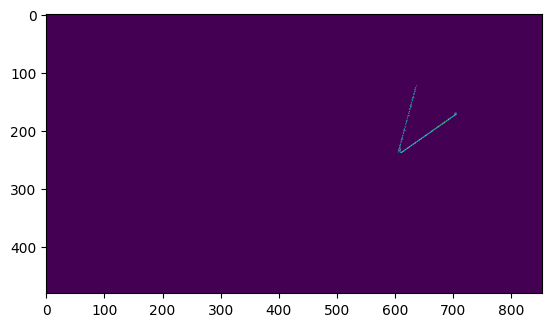

61735


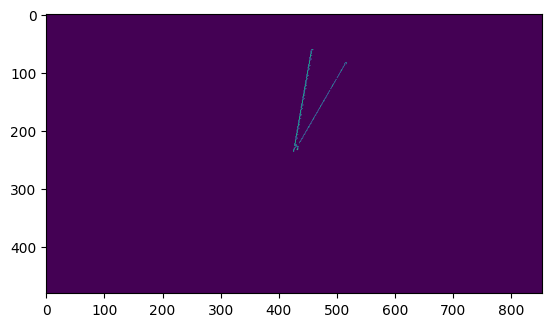

73887


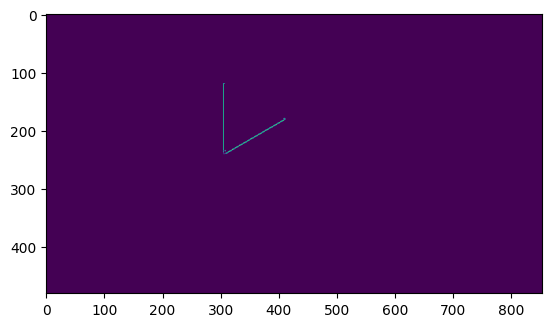

69539


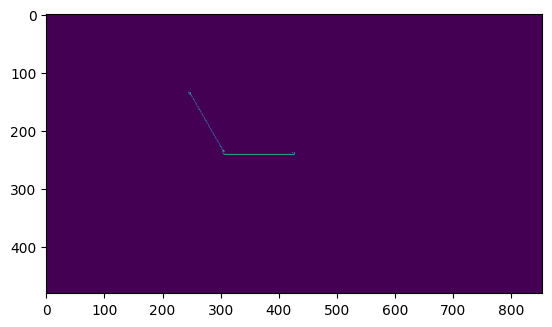

47342


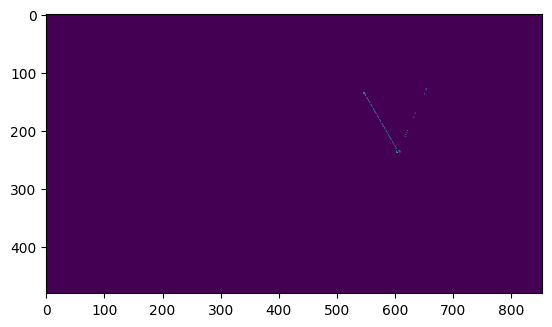

18520


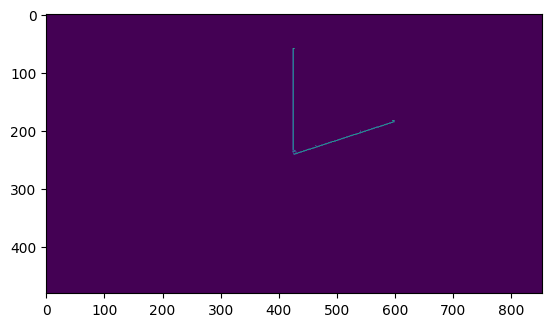

93870


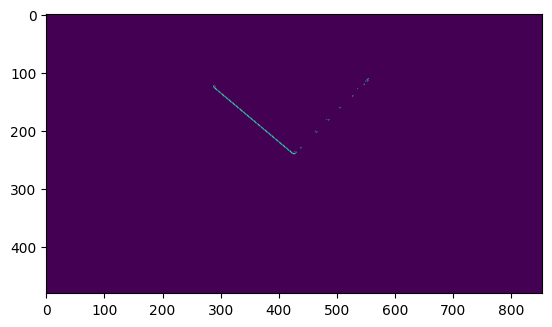

67132


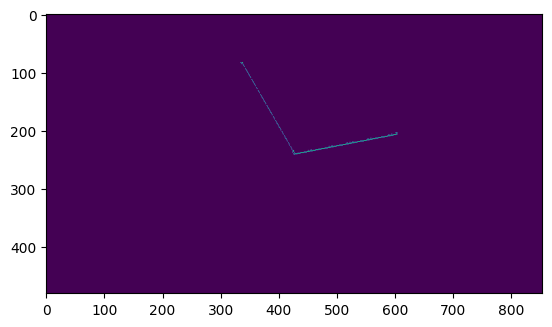

71753


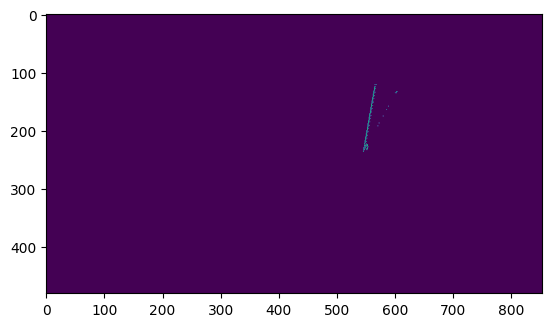

41086


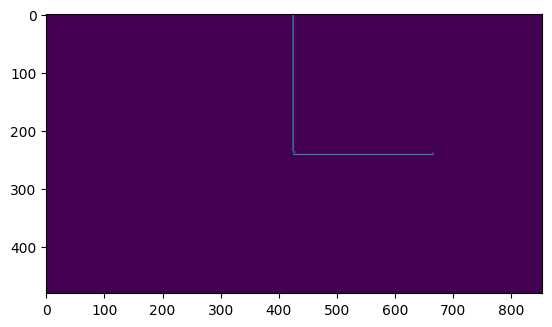

124387


In [8]:
#images = []
#answers = []
dataset = pd.read_csv("Task1Dataset\list.txt")

for (i, row) in enumerate(dataset.itertuples()):
    filename, correct_answer = row.FileName, row.AngleInDegrees
    img = cv2.imread(f"Task1Dataset\{filename}", cv2.IMREAD_GRAYSCALE)
    edges = utils.canny(img, gauss_kernel_size=5, sigma=20, low_threshold=70, high_threshold=110)
    inbuilt_canny = cv2.Canny(img, threshold1=70, threshold2=110)
    plt.imshow(inbuilt_canny-edges)
    plt.show()
    print(np.sum(inbuilt_canny-edges))
    # images.append(edges)
    # answers.append(correct_answer)

# Test params here in for loop

In [2]:
images = []
answers = []
dataset = pd.read_csv("Task1Dataset\list.txt")

for (i, row) in enumerate(dataset.itertuples()):
    filename, correct_answer = row.FileName, row.AngleInDegrees
    img = cv2.imread(f"Task1Dataset\{filename}", cv2.IMREAD_GRAYSCALE)
    edges = utils.canny(img, gauss_kernel_size=5, sigma=20, low_threshold=20, high_threshold=40)
    images.append(edges)
    answers.append(correct_answer)

In [ ]:
thresholds = np.arange(0, 30, 1)
thetas = np.arange(0, 10, 0.1)
rhos =np.arange(0, 1, 0.01)
num_failed = np.zeros((100, 30, 100))
angle_fail = np.zeros((100, 30, 100, 10))
good_params = []
for m in rhos:
    for k in thresholds:
        for j in thetas:
            for i in range(10):
                accumulator, theta_range, rho_range = utils.hough_line(images[i], theta_res = j + 0.1, rho_res = m + 0.01)
                hough_lines = utils.get_lines(accumulator, theta_range, rho_range, threshold = 80 + k)
                
                line_angles = []
                for rho, theta in hough_lines:
                    # Handle whether the line is in the positive or negative x
                    if (rho < 0):
                        theta += np.pi

                    line_angles.append(theta)

                if(len(line_angles) < 2):
                    num_failed[k][int(j*2)] += 1
                    angle_fail[k][int(j*2)][i] = np.inf
                    continue

                # Calculate difference of angles and choose the smaller angle
                angle1 = max(line_angles) - min(line_angles)
                angle2 = (2 * np.pi) - angle1
                angle_between_lines = min(angle1, angle2)
                angle_between_lines = np.round(np.rad2deg(angle_between_lines))

                if angle_between_lines != answers[i]:
                    num_failed[int(m*100)][k][int(j*10)] += 1
                    angle_fail[int(m*100)][k][int(j*10)][i] = abs(angle_between_lines - answers[i])

        if num_failed[int(m*100)][k][int(j*10)] == 0:
            good_params.append(m, k+80, j+0.1)
    
            #print(i)   
            # print(f"theta: {angle_between_lines} -- correct_answer: {correct_answer} -- {pass_fail_string}")

: 

: 

In [5]:
good_params

[]

In [7]:
num_failed

array([[10., 10., 10., ...,  9.,  7.,  5.],
       [10., 10., 10., ...,  8.,  7.,  5.],
       [10., 10., 10., ...,  8.,  7.,  5.],
       ...,
       [10., 10., 10., ...,  6.,  7.,  5.],
       [10., 10., 10., ...,  6.,  7.,  5.],
       [10., 10., 10., ...,  6.,  7.,  5.]])

In [17]:
np.sum(angle_fail, 2)

array([[69., 70., 59., ...,  0.,  0.,  0.],
       [66., 59., 59., ...,  0.,  0.,  0.],
       [64., 51., 55., ...,  0.,  0.,  0.],
       ...,
       [32., 33., 25., ...,  0.,  0.,  0.],
       [31., 31., 25., ...,  0.,  0.,  0.],
       [31., 30., 23., ...,  0.,  0.,  0.]])

## How to task1 <br>
1. Preprocess: turn image to grayscale
2. Edge detection (Canny) <b>NOT</b> using inbuilt function
3. Line detection (Hough) <b>NOT</b> using inbuilf function
4. We get the 2 equations of the lines in 2d space
5. calculate angles


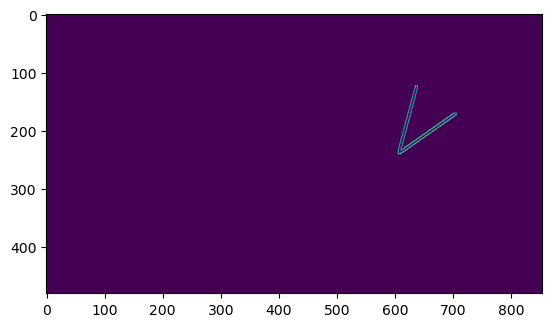

theta: 40.0 -- correct_answer: 40 -- PASS


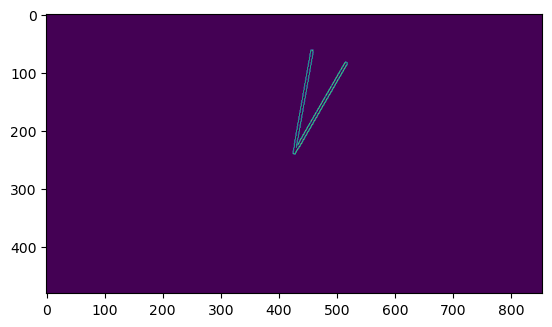

theta: 20.0 -- correct_answer: 20 -- PASS


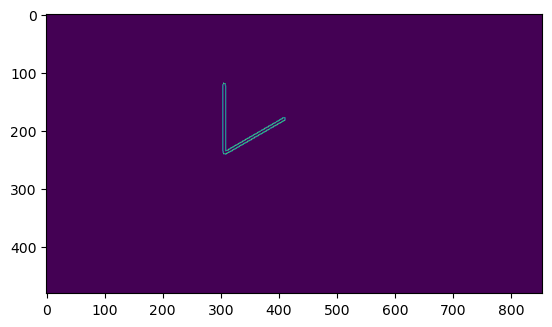

theta: 60.0 -- correct_answer: 60 -- PASS


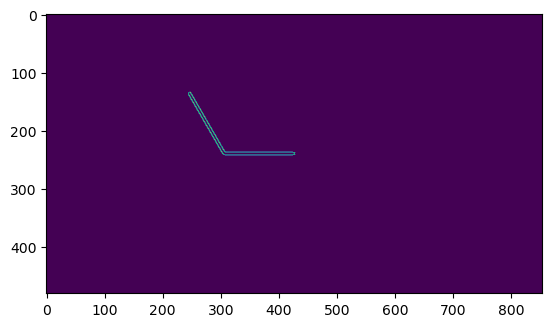

theta: 120.0 -- correct_answer: 120 -- PASS


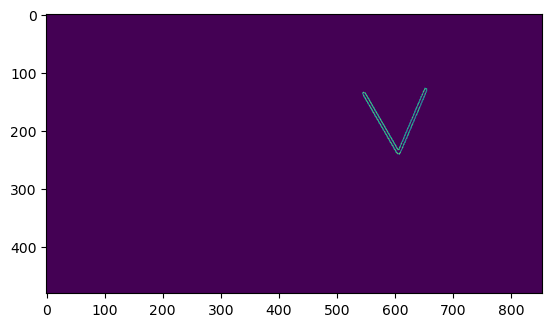

theta: 0.0 -- correct_answer: 53 -- FAIL


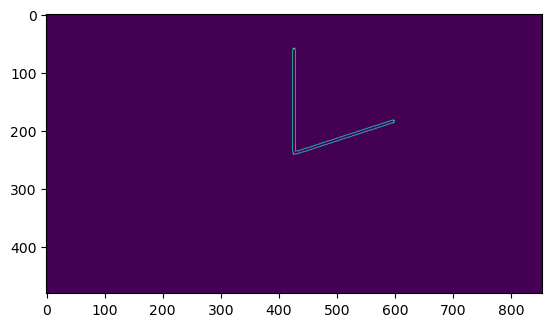

theta: 0.0 -- correct_answer: 72 -- FAIL


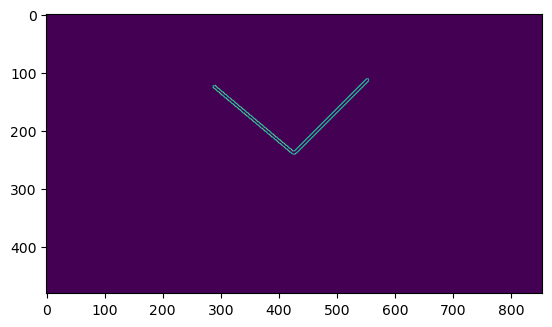

theta: 95.0 -- correct_answer: 95 -- PASS


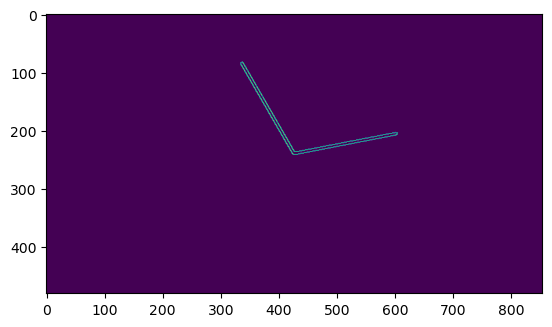

theta: 0.0 -- correct_answer: 109 -- FAIL


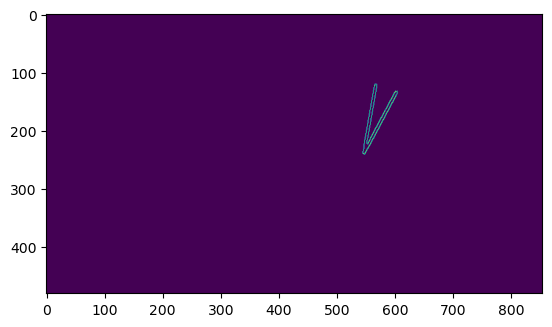

Skipping image9.png - need at least 2 lines


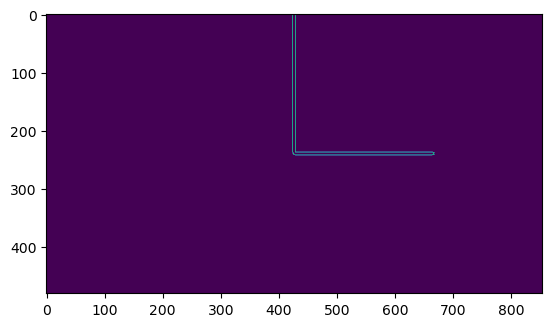

theta: 90.0 -- correct_answer: 90 -- PASS


In [2]:
folderName = "Task1Dataset"
dataset = pd.read_csv(folderName + "\list.txt")

# Empirically chosen thresholds for canny edge detection
lower_threshold = 0.2 * 255
upper_threshold = lower_threshold * 1.5

for (i, row) in enumerate(dataset.itertuples()):
    filename, correct_answer = row.FileName, row.AngleInDegrees

    # Read in image, importantly with intensity values 0-255 not 0-1
    img = cv2.imread(f"{folderName}\\{filename}")

    # Convert to grayscale but store as colour image to keep opencv happy
    gray_img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    #gray_img = cv2.cvtColor(gray_img, cv2.COLOR_GRAY2RGB)
    gray_img = cv2.GaussianBlur(gray_img, (25,25), 2)
    
    # Detect edges with Canny edge detection
    img_edges = cv2.Canny(gray_img, 70, 110)
    plt.imshow(img_edges)
    plt.show()

    hough_lines = cv2.HoughLines(img_edges, rho=1, theta=np.deg2rad(5), threshold=90, lines=None, srn=0, stn=0)

    line_angles = []
    for line in hough_lines:
        (rho, theta) = (line[0][0], line[0][1])
        # Handle whether the line is in the positive or negative x
        if (rho < 0):
            theta += np.pi
        line_angles.append(theta)

    if(len(line_angles) < 2):
        print(f"Skipping {filename} - need at least 2 lines")
        continue
    
    # Calculate difference of angles and choose the smaller angle
    angle1 = max(line_angles) - min(line_angles)
    angle2 = (2 * np.pi) - angle1
    angle_between_lines = min(angle1, angle2)
    angle_between_lines = np.round(np.rad2deg(angle_between_lines))

    pass_fail_string = "PASS" if angle_between_lines == correct_answer else "FAIL"
    print(f"theta: {angle_between_lines} -- correct_answer: {correct_answer} -- {pass_fail_string}")

    # plt.imshow(img_edges)
    # plt.show()

In [3]:
dataset

,FileName,AngleInDegrees
0,image1.png,40
1,image2.png,20
2,image3.png,60
3,image4.png,120
4,image5.png,53
5,image6.png,72
6,image7.png,95
7,image8.png,109
8,image9.png,18
9,image10.png,90


## What to ask <br>
1. Do we need to implement grayscale? No
2. Is Guassian Blur necessary?
3. How to de find good parameters?
4. What are good parameters?
5. We have to implement Canny and Hough, right?

loading and graycale functions are ok
gaussian blur and convolution are not ok